# <span style='color:OrangeRed'>V4 - Regelalgorithmen für die digitale Regelung</span>

In [30]:
from systheo2functions import *
%matplotlib inline

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
<b> Reglerauslegung im Frequenzbereich - Zeitkontinuierlicher PID </b>

Gegeben ist die Regelstrecke:
    <br><br>
    $G_S(s)= \frac{p_1p_2}{s^{2}-(p_1+p_2)s+p_1p_2}$

<b> Codes: </b>
<br><br>
In Python definieren wir:

In [31]:
p1 = -5
p2 = -8

Num = [p1*p2]
Den = [1, -(p1+p2), p1*p2]

Gs = control.TransferFunction(Num,Den)

print(Gs)


      40
---------------
s^2 + 13 s + 40



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir wählen für die Bandbreite $\omega_0=20$ rad /s. 

Die Parameter des <span style='color:goldenrod'> PID Reglers </span> lassen sich
wie folgt berechnen:
                   

In [32]:
#% PID 
omo = 20

Kd = omo/(p1*p2)
Kp = Kd*(-(p1+p2))
Ki = Kd*p1*p2

Gr = control.TransferFunction([Kd, Kp, Ki],[1, 0])

print(Gr)


0.5 s^2 + 6.5 s + 20
--------------------
         s



Bode-Diagramm:


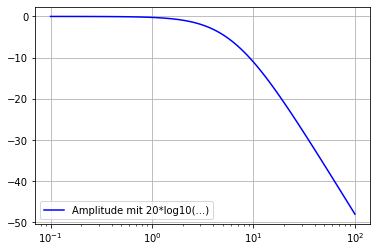

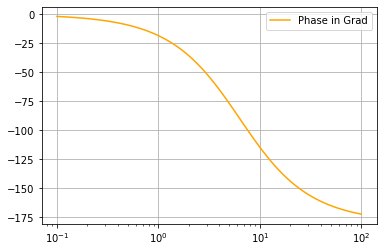

In [33]:
plt_bode(Gs)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das Bodediagramm beschreibt ein Verzögerungselement zweiter Ordnung (PT2). Der Phasenwinkel
verläuft von 0 bis -180 Grad. Die Regelstrecke ist stabil.

Bode-Diagramm:


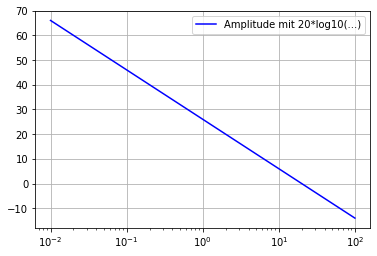

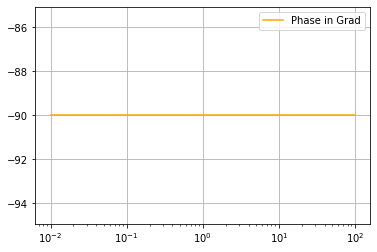

In [34]:
#% PID
Go = Gs*Gr
plt_bode(Go)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der Phasenwinkel bleibt konstant und beträgt -90° (der offene Regelkreis weist integrierendes Verhalten auf).
Die Phasenreserve ist 90°. Der geschlossene Regekreis hat somit ein stabiles und sehr robustes Verhalten.

## <span style='color:Gray'>Beispiel #2 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    <b>Reglerauslegung im Frequenzbereich Zeitkontinuierlicher PI</b>
    <br><br>
In diesem Beispiel wird anstelle eines PID Reglers, ein PI Regler verwendet. Es wird
weiterhin eine Regelstrecke mit zwei Polstellen betrachtet. Wir stellen ein mögliches
Verfahren vor, einen PI Regler auszulegen.
<br><br>
Ausgangspunkt: Wir geben die Bandbreite $\omega_0$ und die gewünschte Phasenreserve $\varphi_m$
vor.
<br><br>
Gesucht wird der Regler in der Form:
<br>
$R(s) = K_P + \frac{K_I}{s}$
 <br><br>
Verfahren: Bei der Bandbreite $\omega_0$ soll die Phasenreserve $\varphi_m$  sein. Die Bandbreite ist als
Durchtrittsfrequenz zu verstehen. Die Durchtrittsfrequenz ist als die Frequenz definiert,
bei der für den Betrag des offenen Regelkreises gilt (mehr dazu in Systemtheorie I):
$|G_o(j\omega_0)|$ = 1

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für den offenen Regelkreis gilt:
<br><br>
$|R(j\omega_0)(G(j\omega_0)| = 1e^{j(-\pi +\varphi_m)}$
<br><br>  
Einsetzen des Frequenzgangs für den PI Regler:
<br><br>
$(K_P + \frac{K_I}{j\omega_0})|G(j\omega_0)|e^{j\varphi_G} = e^{j(-\pi +\varphi_m)}$
<br><br>


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für den PI Regler gilt dann:
<br><br>

$(K_P + \frac{K_I}{j\omega_0})$ = $\frac{e^{j(-\pi +\varphi_m - \varphi_G)}}{|G(j\omega_0)|}$


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Aus dem Koeffizientenvergleich folgen die Parameter und :
<br><br>

$K_P$=$\frac{cos(-\phi + \varphi_m -\varphi_G)}{|G(j\omega_0)|}$
<br><br>
$K_I$=$\frac{-\omega_0sin(-\phi + \varphi_m -\varphi_G)\omega_0}{|G(j\omega_0)|}$

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
In Python definieren wir zunächst die Regelstrecke (Definition bleibt gleich)

In [35]:
p1 = -5
p2 = -8

Num = [p1*p2]
Den = [1, -(p1+p2), p1*p2]

Gs = control.TransferFunction(Num,Den)
print("Gs:"+str(Gs))

Gs:
      40
---------------
s^2 + 13 s + 40



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir wählen für die Bandbreite $\omega_0=10$ rad/s.
Die Parameter des <span style='color:goldenrod'> PI Reglers </span> lassen sich
wie folgt bestimmen:

In [36]:
#% PID 
omo = 10
Fi = 40*pi/180

Go,Fo,o = control.bode(Gs,omo,plot=False)

Kd = 0;
Kp = cos(-pi+Fi-Fo)/Go
Ki = -sin(-pi+Fi-Fo)*omo/Go

print([Kd, Kp, Ki])

Gr = control.TransferFunction([Kd, Kp[0], Ki[0]],[1, 0]);

Go = Gs*Gr
print("Go:"+str(Go))

[0, array([3.2381264]), array([15.25463026])]
Go:
  129.5 s + 610.2
-------------------
s^3 + 13 s^2 + 40 s



Bode-Diagramm:


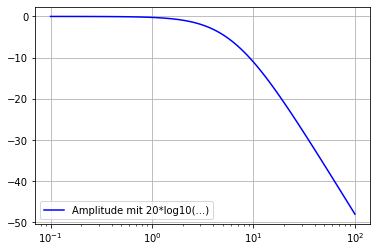

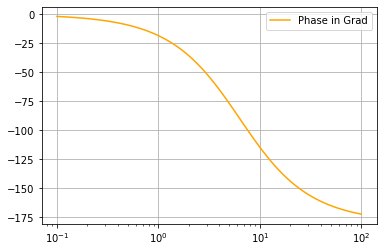

In [37]:
plt_bode(Gs)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das Bodediagramm beschreibt ein Verzögerungselement zweiter Ordnung. Der Phasenwinkel verläuft
von 0 bis -180 Grad. Die Regelstrecke ist stabil.

Bode-Diagramm:


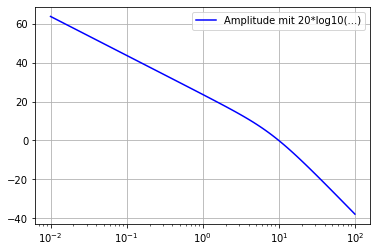

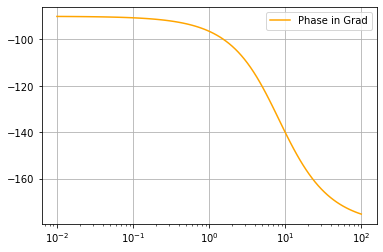

In [38]:
plt_bode(Go)

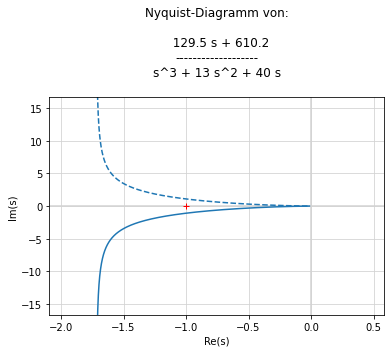

In [39]:
plt_nyquist(Go,0.01,0.1,-2,-1) #Benutze plt_nyquist(Go,1,1,0,0) um das ganze Diagramm zu sehen

In [40]:
margin(Go)

Phasenrand: 40.0° bei Frequenz: 10.0rad/s
keine Amplitudenreserve gefunden


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es liegt eine Phasenreserve von 40 Grad bei der Frequenz  $\omega_0=20$ rad/s vor.

## <span style='color:Gray'>Beispiel #3 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    <b>Reglerauslegung im Frequenzbereich - Zeitdiskreter PI</b>
<br><br>
Es stellt sich nun die Frage, ob wir das Verfahren aus dem zeitkontinuierlichen Fall auch
im zeitdiskreten Bereich nutzen können?
<br><br>
Betrachtet wird wiederum die Regelstrecke:
<br><br>
$G_S(s)= \frac{p_1p_2}{s^{2}-(p_1+p_2)s+p_1p_2}$
<br><br>
<b> Codes: </b>
<br><br>
In Python definieren wir:

In [41]:
p1 = -5;
p2 = -8;

Num = [p1*p2]
Den = [1, -(p1+p2), p1*p2]

Gs = control.TransferFunction(Num,Den)
print("Gs:"+str(Gs))

Gs:
      40
---------------
s^2 + 13 s + 40



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Regelstrecke muss zunächst diskretisiert werden. Dafür verwenden wir in Python
folgende Befehle:

In [42]:
Ts = 0.1;
Gsz = control.sample_system(Gs,Ts,method='zoh')
print("Gsz:"+str(Gsz))

Gsz:
  0.1315 z + 0.08521
----------------------
z^2 - 1.056 z + 0.2725

dt = 0.1



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für den zeitdiskreten Regler verwenden wir zunächst die gleichen Parameter, die wir für
den zeitkontinuierlichen PI Regler bestimmen haben.
<br><br>
Für den zeitkontinuierlichen Fall wurden folgende Parameter bestimmt:

In [43]:
#% PID 
omo = 10
Fi = 46*pi/180

Go,Fo,o = control.bode(Gs,omo,plot=False)

Kd = 0;
Kp = cos(-pi+Fi-Fo)/Go
Ki = -sin(-pi+Fi-Fo)*omo/Go

print([Kd, Kp, Ki])

Gr = control.TransferFunction([Kd, Kp[0], Ki[0]],[1, 0]);

Go = Gs*Gr

[0, array([3.37984191]), array([11.78630003])]


Bode-Diagramm:


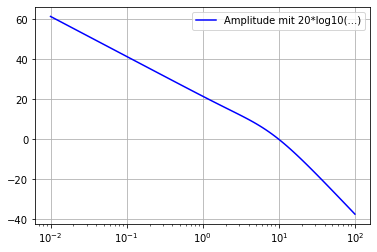

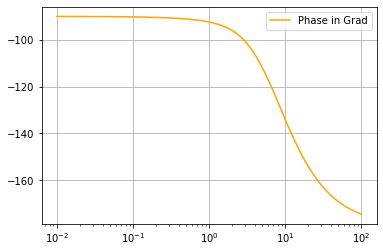

In [44]:
plt_bode(Go)

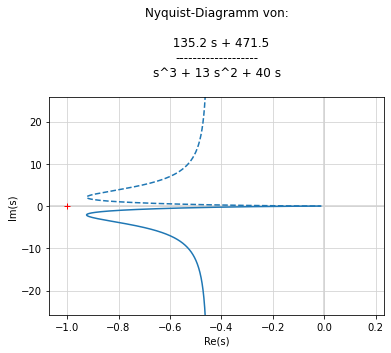

In [45]:
plt_nyquist(Go,0.01,0.2,-1,-1) #Benutze plt_nyquist(Go,1,1,0,0) um das ganze Diagramm zu sehen

In [46]:
margin(Go)

Phasenrand: 46.0° bei Frequenz: 10.0rad/s
keine Amplitudenreserve gefunden


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für den<span style='color:goldenrod'> zeitdiskreten Regler </span>  verwenden wir zunächst die gleichen Parameter, die wir für
den <span style='color:goldenrod'> zeitkontinuierlichen PI Regler </span> bestimmen haben.

In [47]:
Kr = Kp
Ti = Kr/Ki

Zn = 1/(1+Ts/Ti)

Numrz = [float(Kr/Zn), float(-Kr)]
Denrz = [1, -1]

Grz = control.TransferFunction(Numrz,Denrz,Ts)
print("Grz:"+str(Grz))

Grz:
4.558 z - 3.38
--------------
    z - 1

dt = 0.1



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun wird der zeitdiskrete offene Regelkreis im Frequenzbereich analysiert.

Goz:
  0.5993 z^2 - 0.05593 z - 0.288
----------------------------------
z^3 - 2.056 z^2 + 1.328 z - 0.2725

dt = 0.1

Phasenrand: 18.056° bei Frequenz: 10.623rad/s
Amplitudenreserve: 1.655 bei Frequenz: 14.128rad/s
Bode-Diagramm:


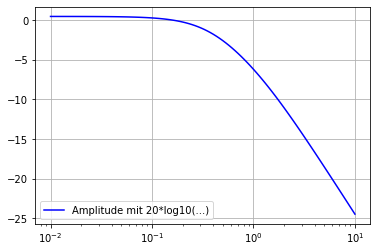

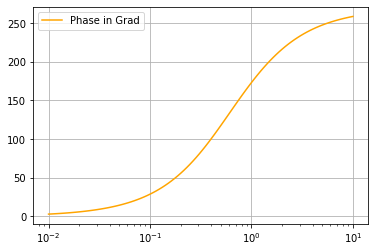

In [48]:
Goz = Gsz*Grz
print("Goz:"+str(Goz))
margin(Goz)

plt_bode(Goz)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wenn wir die Parameter des zeitkontinuierlichen Reglers übernehmen, beträgt die
Phasenreserve des zeitdiskreten Regelkreises 18 Grad (180°-162°=18°) anstatt der
gewünschten 40 Grad.
<br><br>
Durch die Diskretisierung wird die Phasenreserve kleiner als im zeitkontinuierlichen
Bereich
<br><br>
Unter bestimmten Bedingungen kann der Phasenverlust näherungsweise ausgerechnet
werden.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der Phasenverlust beträgt im zeitdiskreten Fall:
<br><br>
$\Delta\varphi = \frac{\omega_0T_s}{2}$
 <br><br>

In unserem Beispiel wäre der Phasenverlust:
<br><br>
$\Delta\varphi =\frac{10rad/s 0.1s}{2} \frac{180}{\pi}= 28,6479$
<br><br>
Damit der Phasenverlust bei derselben Bandbreite nicht zu groß wird , müssen wir die
Abtastzeit verkleinern . Wenn wir als Abtastzeit$T_2 = 0.02s$ wählen:
 <br><br>
$\Delta\varphi =\frac{10rad/s 0.1s}{2} \frac{180}{\pi} = 5,7296$

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

<span style='color:orange'> Vorgehen </span>: Wir möchten, dass der zeitdiskrete Regelkreis ebenfalls eine Phasenreserve
von 40 Grad aufweist.
<br><br>
Wir berechnen $K_P$ und $K_I$ für den zeitkontinuierlichen Fall. Anstatt$K_P$ und $K_I$ für eine
Phasenreserve von 40 Grad zu bestimmen, berechnen wir diese Parameter nun für eine
Phasenreserve von $40 + \Delta\phi$ .
<br><br>
Durch die Diskretisierung entsteht ein Phasenverlust von genau  $\Delta\phi$ .
<br><br>
Schlussendlich erhält man einen zeitdiskreten Regler, der sicherstellt, dass der zeitdiskrete
Regelkreis eine Phasenreserve von 40 Grad aufweist (wie gewünscht)!
<br><br>
<span style='color:cyan'> Vorteil </span> dieses Verfahren: Bei ausreichend kleiner Abtastzeit kann der Reglerentwurf wie
im zeitkontinuierlichen Fall durchgeführt werden und der resultierende Regler als
zeitdiskreter Regler verwendet werden.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

In Python wählen wir zunächst anstatt der Abtastzeit 0.1s die Abtastzeit 0.02s aus. Damit
wird sichergestellt, dass der Phasenverlust zwischen dem zeitkontinuierlichen und dem
zeitdiskreten Fall nicht zu groß wird (der Phasenverlust wird dadurch von 28°für 0.1s auf
6° für 0.02s reduziert).

<b> Ihre Aufgabe: </b>
<br><br>
Wählen Sie die Phasenreserve größer !

## <span style='color:Gray'>Beispiel #4 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben ist die Regelstrecke
<br><br>
$G_S(s)= \frac{p_1p_2}{s^{2}-(p_1+p_2)s+p_1p_2}$
<br><br>
Dieses System 2. Ordnung wird in Python wie folgt definiert:


      40
---------------
s^2 + 13 s + 40

Bode-Diagramm:


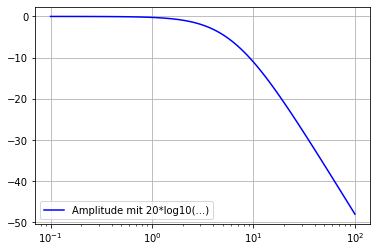

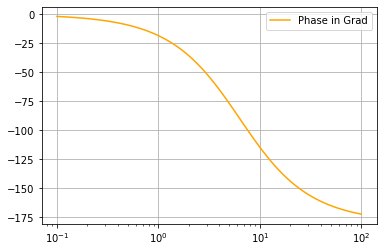

In [49]:
p1 = -5
p2 = -8

Num = [p1*p2]
Den = [1, -(p1+p2), p1*p2]

Gs = control.TransferFunction(Num,Den)
print(Gs)

plt_bode(Gs)


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Regelstrecke wird diskretisiert weil nur für zeitdiskrete Systeme ein Deadbeat Regler
ausgelegt werden kann:

In [50]:
Ts = 0.02
Gsz = control.sample_system(Gs,Ts,'zoh')
print("Gsz:")
print(Gsz)

Gsz:

 0.00734 z + 0.006731
----------------------
z^2 - 1.757 z + 0.7711

dt = 0.02



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir definieren das gewünschte Verhalten des geschlossenen Regelkreises durch die
Eingabe des gewünschten Übertragungsverhaltens <code>Kw</code>

In [51]:
Kw = control.TransferFunction(1,[1, 0, 0],Ts);

Grz = Kw/(Gsz*(1-Kw))
print("Grz:")
print(Grz)

Gl = Gsz*Grz
print("\nGl=Gsz*Grz:")
print(Gl)

Numz = Grz.num[0][0]
Denz = Grz.den[0][0]

Grz:

             z^4 - 1.757 z^3 + 0.7711 z^2
-------------------------------------------------------
0.00734 z^5 + 0.006731 z^4 - 0.00734 z^3 - 0.006731 z^2

dt = 0.02


Gl=Gsz*Grz:

              0.00734 z^5 - 0.006165 z^4 - 0.006166 z^3 + 0.00519 z^2
-----------------------------------------------------------------------------------
0.00734 z^7 - 0.006165 z^6 - 0.01351 z^5 + 0.01136 z^4 + 0.006166 z^3 - 0.00519 z^2

dt = 0.02



In [52]:
p1 = -5
p2 = -8

Num = [p1*p2];
Den = [1, -(p1+p2), p1*p2]

In [53]:
Grz = control.TransferFunction([1, -1.757, 0.7711, 0, 0], [0.00734, 0.006731, -0.00734, 0.006731, 0, 0], 0.02)
print("Grz:")
print(Grz)

Numrz = Grz.num[0][0]
Denrz = Grz.den[0][0]

Grz:

             z^4 - 1.757 z^3 + 0.7711 z^2
-------------------------------------------------------
0.00734 z^5 + 0.006731 z^4 - 0.00734 z^3 + 0.006731 z^2

dt = 0.02



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Folgende Regelstrecke wird simuliert:

![title](bilder/v04_regelstrecke.png)
</div>


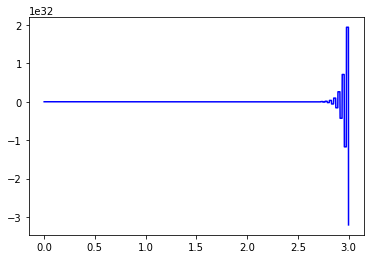

In [54]:
import sys
sys.path.append('Pysim')

from Schema import Schema
from Block import TransferFunction, Sum, StepSource
from DTBlock import DTTransferFunction

tini = 0 # Start time
tfinal = 3 # End time
dt = 0.001 # Time Step
nflows = 5 #Number of data flows in the schematic, Zahlenwert entspricht nicht dem in Matlab (hier um 1 größer)
Ts = 0.02 # Sampling time for discrete time

sc = Schema(tini,tfinal,dt,nflows) # Instance of the simulation schematic
#print("Number of data flows: " + str(sc.nflows))

c1 = StepSource(1,0,1,0.1) #StepSource(self,out,startv,endv,ts)
c2 = Sum(1,4,2,1,-1) #Sum(self,in1,in2,out,sign1,sign2)
c3 = DTTransferFunction(2,3,Numrz,Denrz,Ts); #DTTransferFunction(self,inp,out,num,den,Ts)
c4 = TransferFunction(3,4,Num,Den); #TransferFunction(self,inp,out,num,den)
sc.AddListComponents(np.array([c1,c2,c3,c4]));

#Run the schematic and plot:
out = sc.Run(np.array([1, 2, 3, 4]));
plt.plot(out[0,:],out[3,:],"blue");
plt.show()

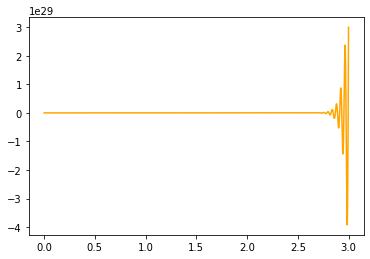

In [55]:
plt.plot(out[0,:],out[4,:],'orange')
plt.show()

## <span style='color:Gray'>Beispiel #5 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für die gleiche Regelstrecke werden wir nun einen Regler mit
endlicher, aber nicht minimaler, Einstellzeit ( Deadbeat ) einsetzen.
<br><br>
Die Übertragungsfunktion dieses Reglers ergibt sich aus der Anforderung an das
Wunschübertragungsverhalten.
<br><br>
Das Sollübertragunsverhalten wird durch die Übertragungsfunktion <code>Kw</code> für den
geschlossenen Regelkreis definiert, die nun eine höhere Ordnung aufweist .

In [27]:
Kw = control.TransferFunction([0.2, 0.4, 0.6, 0.8, 1],[3, 0, 0, 0, 0, 0],Ts)
print("Kw:"+str(Kw))

Kw:
0.2 z^4 + 0.4 z^3 + 0.6 z^2 + 0.8 z + 1
---------------------------------------
                 3 z^5

dt = 0.02



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Der Regler wird wie im Fall vom Deadbeat Regler wie folgt definiert:

In [28]:
Grz = Kw/(Gsz*(1-Kw))
print("Grz:"+str(Grz))

Gl = Gsz*Grz;
print("Gl:"+str(Gl))

Numz = Grz.num[0][0];
Denz = Grz.den[0][0];

Grz:
      0.6 z^11 + 0.1458 z^10 + 0.1543 z^9 + 0.1627 z^8 + 0.1711 z^7 - 3.42 z^6 + 2.313 z^5
-------------------------------------------------------------------------------------------------
0.06606 z^11 + 0.05617 z^10 - 0.01285 z^9 - 0.02129 z^8 - 0.02973 z^7 - 0.03817 z^6 - 0.02019 z^5

dt = 0.02

Gl:
     0.004404 z^12 + 0.005109 z^11 + 0.002114 z^10 + 0.002232 z^9 + 0.002351 z^8 - 0.02395 z^7 - 0.006043 z^6 + 0.01557 z^5
---------------------------------------------------------------------------------------------------------------------------------
0.06606 z^13 - 0.05989 z^12 - 0.0606 z^11 + 0.04459 z^10 - 0.002232 z^9 - 0.002351 z^8 + 0.02395 z^7 + 0.006043 z^6 - 0.01557 z^5

dt = 0.02




Gs:

      40
---------------
s^2 + 13 s + 40

Bode-Diagramm:


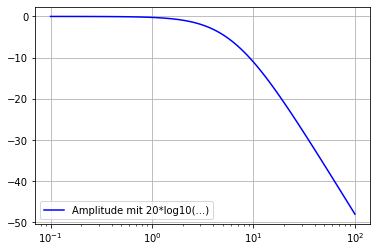

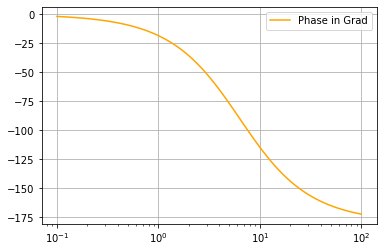



Gsz:

 0.00734 z + 0.006731
----------------------
z^2 - 1.757 z + 0.7711

dt = 0.02



In [29]:
p1 = -5
p2 = -8

Num = [p1*p2]
Den = [1, -(p1+p2), p1*p2]

Gs = control.TransferFunction(Num,Den)
print("\nGs:")
print(Gs)
plt_bode(Gs)
print("")


Ts = 0.02
Gsz = control.sample_system(Gs,Ts,'zoh')
print("\nGsz:")
print(Gsz)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Regelgröße erreicht die Führungsgröße
nicht in zwei Abtastschritten (minimaler
Anzahl an Abtastschritten), sondern es
werden mehr Schritte benötigt.
<br><br>
<span style='color:cyan'> Vorteil </span> der sich aus so einer Reglerauslegung
ergibt
≡ der Stellgrößenverlauf hat nicht so höhe Sprünge
wie in Fall einer Deadbeat Reglers